In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tracesz = np.load(r'2013.11.14-12.33.38_traces.npz')
pt = np.load(r'2013.11.14-12.33.38_textin.npy')

In [3]:
traces = tracesz['arr_0']
(numtraces,numpoint) = np.shape(traces)
np.shape(traces)

(10001, 3000)

In [4]:
knownkey = np.load(r'2013.11.14-12.33.38_knownkey.npy')
"".join(["%02x "%k for k in knownkey])

'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c '

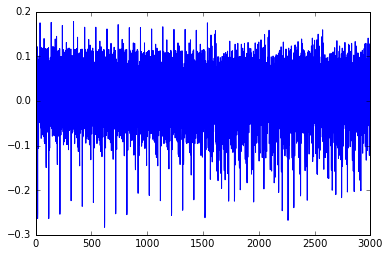

In [5]:
plt.plot(traces[0])

In [6]:
sbox=(
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76,
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0,
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15,
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75,
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84,
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf,
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8,
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2,
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73,
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb,
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79,
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08,
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a,
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e,
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf,
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0,256)]

In [14]:
runs = int((numtraces-1)/100)
runs

100

In [8]:
traces[100:105,:]

array([[ 0.12207031, -0.02636719, -0.03222656, ...,  0.00878906,
         0.00976562, -0.06347656],
       [-0.02539062, -0.02832031, -0.06054688, ...,  0.01269531,
        -0.0625    ,  0.08691406],
       [-0.02636719, -0.03125   , -0.06445312, ...,  0.00585938,
        -0.06347656,  0.08789062],
       [-0.02148438, -0.0234375 , -0.05859375, ...,  0.01855469,
        -0.05761719,  0.08984375],
       [-0.01757812, -0.01660156, -0.05371094, ...,  0.02148438,
        -0.05859375,  0.09179688]])

In [ ]:
#Set 16 to something lower (like 1) to only go through a single subkey
bestguess = [0]*16
pge = [256]*16
ySR = []
xSR = []
for bnum in range(0, 1):
    cpaoutput = [0]*256
    maxcpa = [0]*256
    
    #Initialize arrays & variables to zero
    sumnum = np.zeros(numpoint)
    sumden1 = np.zeros(numpoint)
    sumden2 = np.zeros(numpoint)

    hyp = np.zeros(100)
    #For each trace, do the following
    for tnum in range(0, 100):
        success = 0
        print("tnum:",tnum)
        for run in range(runs):
            print("run:",run)
            for kguess in range(0, 256):
                sumnum = np.zeros(numpoint)
                sumden1 = np.zeros(numpoint)
                sumden2 = np.zeros(numpoint)
                for ttnum in range(0, tnum):
                    hyp[ttnum] = HW[intermediate(pt[run*100+ttnum][bnum], kguess)]
                #Mean of hypothesis
                meanh = np.mean(hyp[0:tnum], dtype=np.float64)

                #Mean of all points in trace
                meant = np.mean(traces[run*100:run*100+tnum,:], axis=0, dtype=np.float64)
                for ttnum in range(0, tnum):
                    hdiff = (hyp[ttnum] - meanh)
                    tdiff = traces[run*100+ttnum,:] - meant

                    sumnum = sumnum + (hdiff*tdiff)
                    sumden1 = sumden1 + hdiff*hdiff
                    sumden2 = sumden2 + tdiff*tdiff

                cpaoutput[kguess] = sumnum / np.sqrt( sumden1 * sumden2 )
                maxcpa[kguess] = max(abs(cpaoutput[kguess]))
            # print(kguess)
            # print(maxcpa[kguess])
            bestguess[bnum] = np.argmax(maxcpa)
            #print(bestguess[bnum])
            if knownkey[bnum] == bestguess[bnum]:
                success += 1.0
        ySR.append(success/runs)
        print(success/runs)
        xSR.append(tnum)

tnum: 0
run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
run: 6
run: 7
run: 8
run: 9
run: 10
run: 11
run: 12
run: 13
run: 14
run: 15
run: 16
run: 17
run: 18
run: 19
run: 20
run: 21
run: 22
run: 23
run: 24
run: 25
run: 26
run: 27
run: 28
run: 29
run: 30
run: 31
run: 32
run: 33
run: 34
run: 35
run: 36
run: 37
run: 38
run: 39
run: 40
run: 41
run: 42
run: 43
run: 44
run: 45
run: 46
run: 47
run: 48
run: 49
run: 50
run: 51
run: 52
run: 53
run: 54
run: 55
run: 56
run: 57
run: 58
run: 59
run: 60
run: 61
run: 62
run: 63
run: 64
run: 65
run: 66
run: 67
run: 68
run: 69
run: 70
run: 71
run: 72
run: 73
run: 74
run: 75
run: 76
run: 77
run: 78
run: 79
run: 80
run: 81
run: 82
run: 83
run: 84
run: 85
run: 86
run: 87
run: 88
run: 89
run: 90
run: 91
run: 92
run: 93
run: 94
run: 95
run: 96
run: 97
run: 98
run: 99
0.0
tnum: 1
run: 0
run: 1
run: 2
run: 3
run: 4
run: 5
run: 6
run: 7
run: 8
run: 9
run: 10
run: 11
run: 12
run: 13
run: 14
run: 15
run: 16
run: 17
run: 18
run: 19
run: 20
run: 21
run: 22
run: 23
run: 24


In [ ]:
ySR

In [ ]:
plot(xSR,ySR)